#BigMart Sales Prediction practice problem

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [477]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

In [478]:
df_train = pd.read_csv(r"C:\Users\HP\Desktop\bigdatamart_train.csv",engine='python')
df_test = pd.read_csv(r"C:\Users\HP\Desktop\bigdatamart_test.csv",engine='python')

2. Data Visualisation and Cleaning

In [479]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [480]:
df_train.shape

(8523, 12)

 We will try to check each of them out one by one to understand how we should treat the bad values.
First of all, let us check the various datatypes.

In [481]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [482]:
# we will be required to convert the values into numbers through the process of label encoding or one hot encoding technique.

In [483]:
df_train.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [484]:
#we see that only two columns have null values associated with them which are Item_Weight and Outlet_Size. 
#Let us visualise it with a heatmap.

<AxesSubplot:>

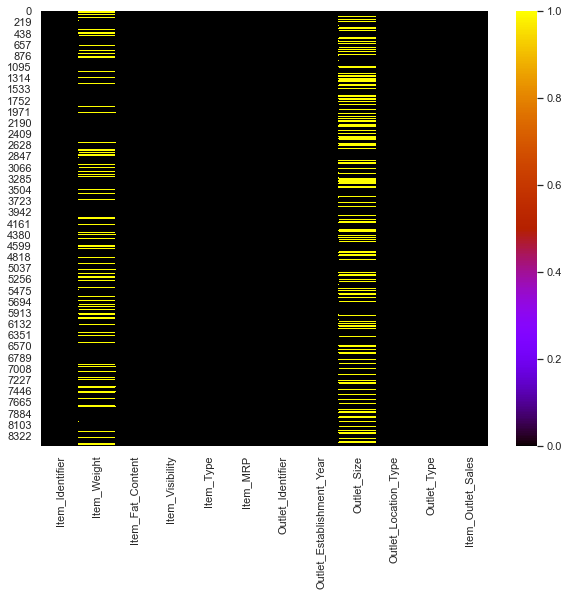

In [485]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isna(),cmap='gnuplot')

In [486]:
#The yellow marks show presence of null values. 
#We have a few null values in these two columns that will need to be sorted out

In [487]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

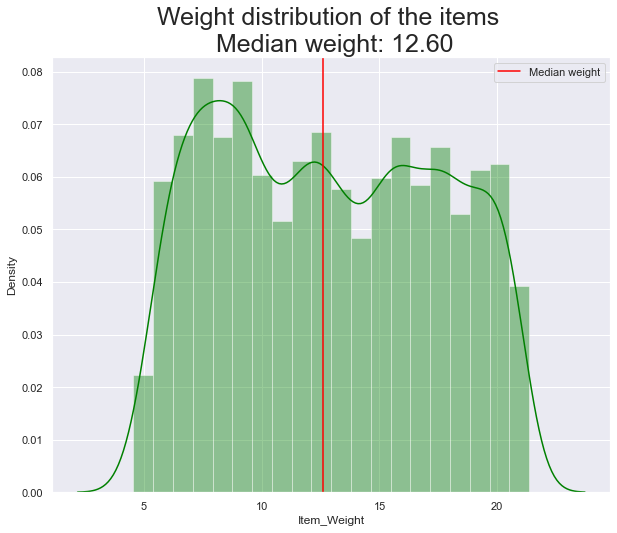

In [488]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['Item_Weight'].dropna(),color='green')
plt.title('Weight distribution of the items \n Median weight: {0:.2f}'.format(df_train['Item_Weight'].dropna().median()),size=25)
plt.axvline(df_train['Item_Weight'].dropna().median(),color='red',label='Median weight')
plt.legend()

Text(0.5, 1.0, 'Violinplot of weights')

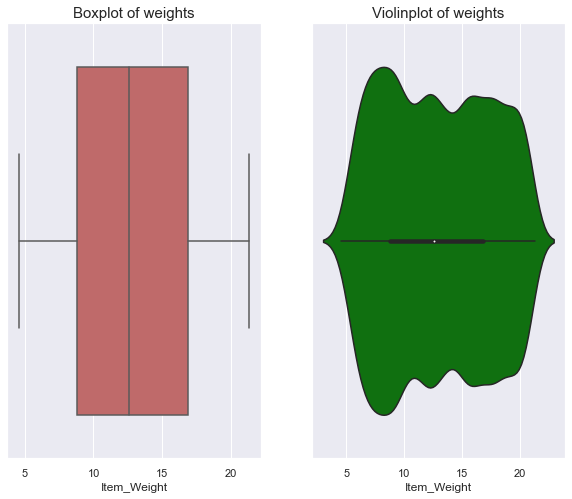

In [489]:
fig1=plt.figure(figsize=(10,8))
ax1=fig1.add_subplot(121)
sns.boxplot(df_train['Item_Weight'],ax=ax1,orient='v',color='indianred')
ax1.set_title('Boxplot of weights',size=15)

ax2=fig1.add_subplot(122)
sns.violinplot(df_train['Item_Weight'],ax=ax2,orient='v',color='green')
ax2.set_title('Violinplot of weights',size=15)


In [490]:
#As we can see from the above violin and distplot, the curve platueus over a large range of weights. 
#Hence, it is simply not possible for us to assume a weight for the null values. We shall leave them as it is or drop them

In [491]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [492]:
#Technically, we have only two unique values which are either low fat or regular.

In [493]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('low fat','Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('LF','Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('reg','Regular')
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

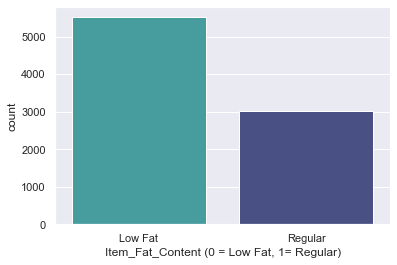

In [494]:
sns.countplot(x='Item_Fat_Content', data=df_train, palette="mako_r")
plt.xlabel("Item_Fat_Content (0 = Low Fat, 1= Regular)")
plt.show()

In [495]:
#This assumes that majority of customers are health conscious and prefer food with lower fat rating.

Item_Visibility

In [496]:
df_train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

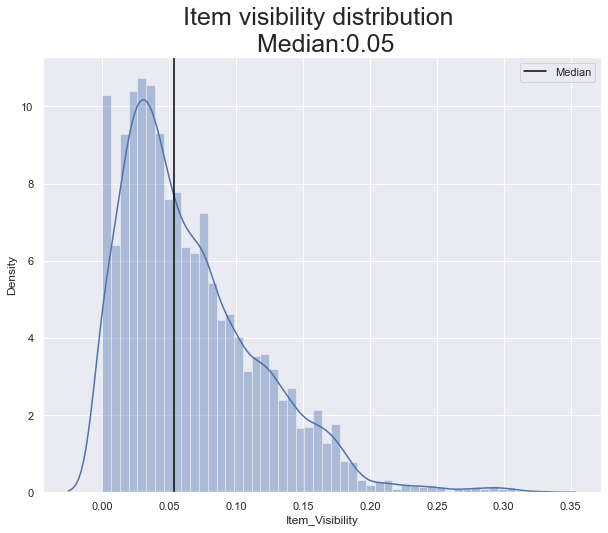

In [497]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['Item_Visibility'])
plt.title('Item visibility distribution \n Median:{0:.2f}'.format(df_train['Item_Visibility'].median()),size=25)
plt.axvline(df_train['Item_Visibility'].median(),color='black',label='Median')
plt.legend()

In [498]:
#As we see from the curve, the item visibility has a right skew.
#Hence, a median would give us better indication than a mean value. Let us check for outliers if any.

((array([-3.77092014, -3.54353752, -3.4185981 , ...,  3.4185981 ,
          3.54353752,  3.77092014]),
  array([0.        , 0.        , 0.        , ..., 0.32111501, 0.32578081,
         0.32839095])),
 (0.04934877527401503, 0.06613202877895105, 0.9560728731678172))

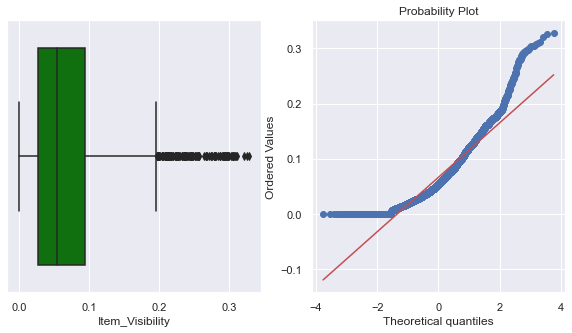

In [499]:
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(df_train['Item_Visibility'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(df_train['Item_Visibility'],plot=ax2)

In [500]:
#As we can see, values above 0.2 visibility are outliers.
#Hence, we need to remove the outliers and try to form a normal distribution.

#The probplot also seems to suggest that the values are deviating from the normal values after 0.2

In [501]:
df_train[df_train['Item_Visibility']>0.2].shape[0]

134

In [502]:
#we have only 134 entries which are outliers. It would serve us well to simply remove these entries.

((array([-3.7669643 , -3.53935697, -3.41428343, ...,  3.41428343,
          3.53935697,  3.7669643 ]),
  array([0.        , 0.        , 0.        , ..., 0.19899855, 0.19993588,
         0.19995527])),
 (0.044876265916263924, 0.06322235269591131, 0.9681235088881054))

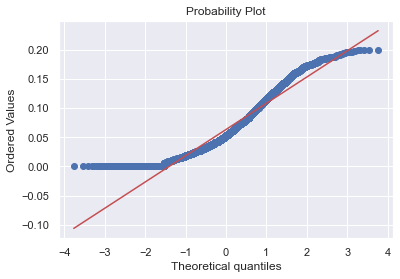

In [503]:
df_train=df_train[df_train['Item_Visibility']<0.2]
stats.probplot(df_train['Item_Visibility'],plot=plt)

In [504]:
#Now, we see that the values above 0 are following a normal distribution to some extent. 

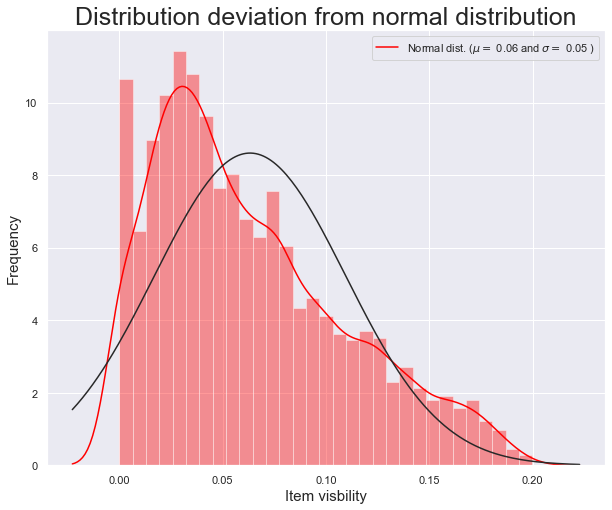

In [505]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['Item_Visibility'],fit=norm,color='red')
plt.title('Distribution deviation from normal distribution',size=25)
plt.ylabel('Frequency',size=15)
plt.xlabel('Item visbility',size=15)
mu=df_train['Item_Visibility'].mean()
sigma=df_train['Item_Visibility'].std()
plt.legend(['Normal dist. ($\mu=$ {0:.2f} and $\sigma=$ {1:.2f} )'.format(mu, sigma)])

In [506]:
#This is as close to a normal distribution 

Item_Type

In [507]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [508]:
df_train.Item_Type.value_counts()

Fruits and Vegetables    1209
Snack Foods              1182
Household                 899
Frozen Foods              845
Dairy                     670
Canned                    639
Baking Goods              633
Health and Hygiene        516
Soft Drinks               440
Meat                      419
Breads                    248
Hard Drinks               211
Others                    168
Starchy Foods             143
Breakfast                 106
Seafood                    61
Name: Item_Type, dtype: int64

In [509]:
# we see that fruits and vegetables were the highest sold item followed closely by Snack foods.

Item_MRP

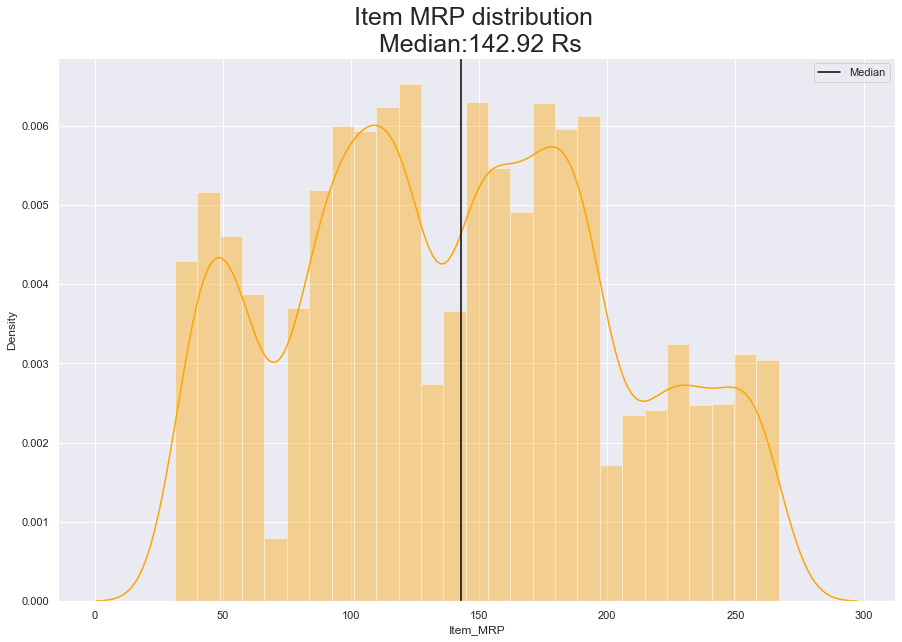

In [510]:
plt.figure(figsize=(15,10))
sns.distplot(df_train['Item_MRP'],color='orange')
plt.title('Item MRP distribution \n Median:{0:.2f} Rs'.format(df_train['Item_MRP'].median()),size=25)
plt.axvline(df_train['Item_MRP'].median(),color='black',label='Median')
plt.legend()

In [511]:
#we don't have any clear distribution of the prices here

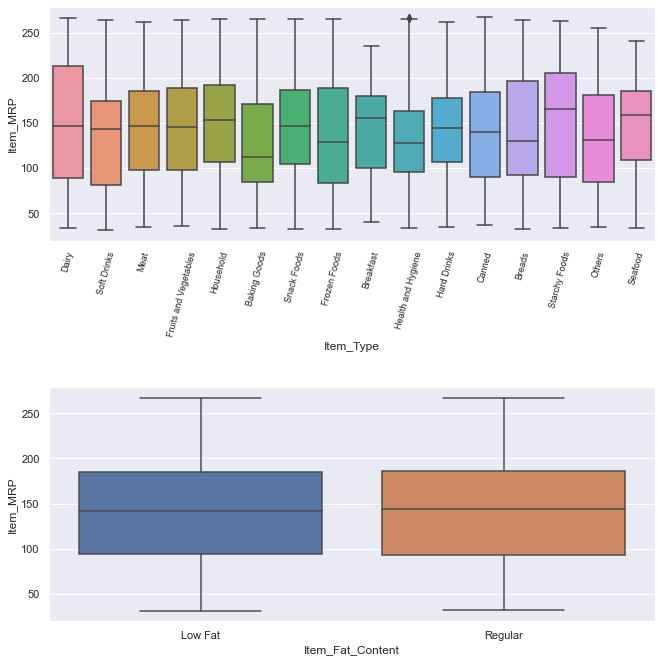

In [512]:
labels=df_train['Item_Type'].unique()
fig6=plt.figure(figsize=(10,10))
ax1=fig6.add_subplot(211)
sns.boxplot(x='Item_Type',y='Item_MRP',data=df_train,ax=ax1)
ax1.set_xticklabels(labels, rotation=75,size=9)

ax2=fig6.add_subplot(212)
sns.boxplot(x='Item_Fat_Content',y='Item_MRP',data=df_train,ax=ax2)

fig6.tight_layout(pad=3)

In [513]:
#we see which item types have high MRPs. Dairy product and Starchy foods have a higher median price than the rest.

#Both low and regular food have almost identical median price.

Outlet_Identifier

In [514]:
df_train['Outlet_Identifier'].unique()


array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [515]:
df_train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    493
OUT019    456
Name: Outlet_Identifier, dtype: int64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

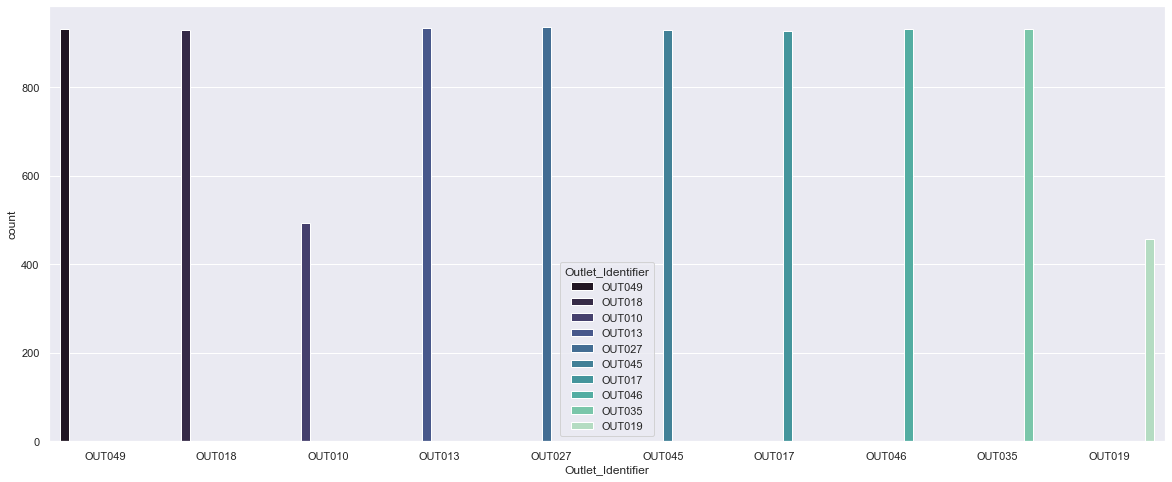

In [516]:
plt.figure(figsize=(20,8))
sns.countplot('Outlet_Identifier',hue='Outlet_Identifier',data=df_train,palette='mako')

In [517]:
#most of the outlets have performed similarly with approximately 950 items sold. 
#Outlet 10 and 19 are however lagging behind in sales.

Outlet_Establishment_Year

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_MRP'>

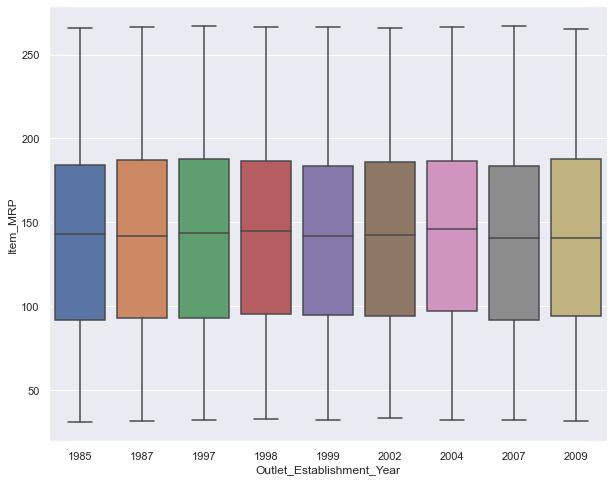

In [518]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Establishment_Year','Item_MRP',data=df_train)

In [519]:
#the median prices of items sold is nearly the same. 
#Hence, customers have no bias to buy more expensive products from older or newer markets.

Text(0.5, 1.0, 'Outlet sales')

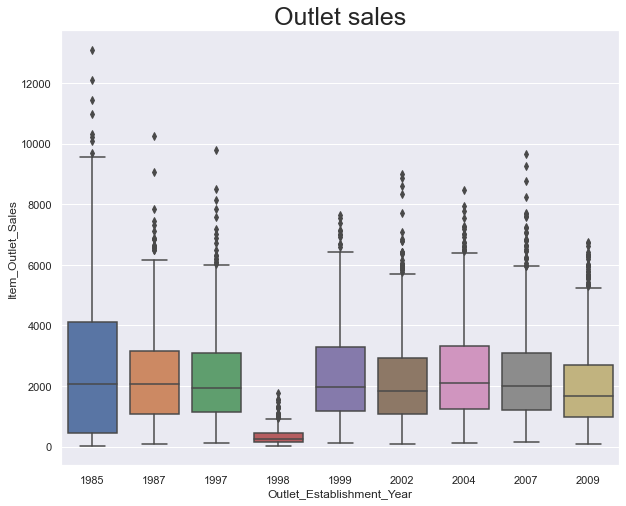

In [520]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=df_train)
plt.title('Outlet sales',size=25)

In [521]:
#As it can be seen, the sales reported by the older stores is higher than the relatively newer stores, except in 1998

Outlet_Size

In [522]:
df_train['Outlet_Size'].isna().value_counts()

False    6041
True     2348
Name: Outlet_Size, dtype: int64

In [523]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

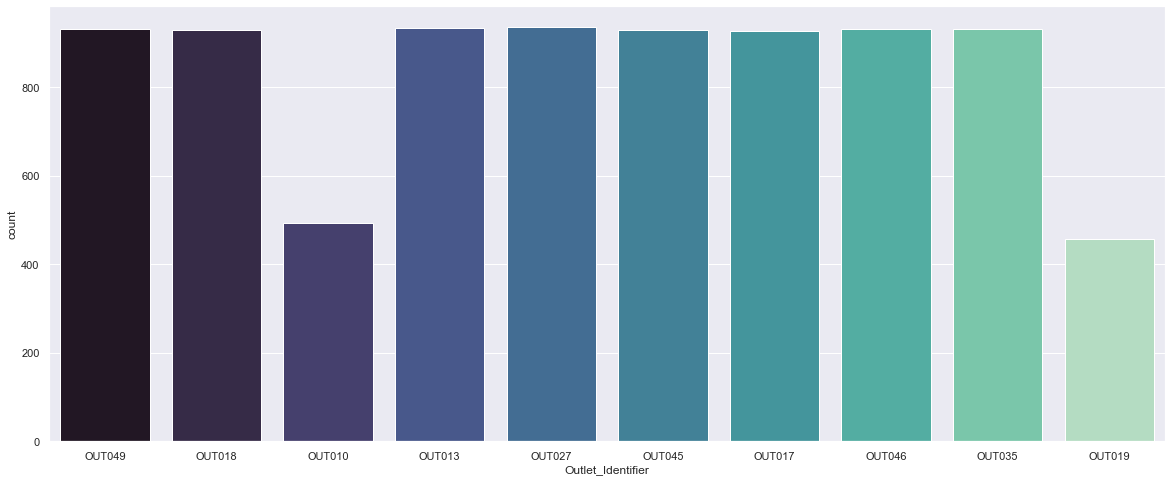

In [524]:
plt.figure(figsize=(20,8))
sns.countplot('Outlet_Identifier',data=df_train,palette='mako')

In [525]:
df_size_sales=df_train.groupby('Outlet_Size')[['Item_MRP','Item_Outlet_Sales']].mean().reset_index()

In [526]:
df_size_sales

,Outlet_Size,Item_MRP,Item_Outlet_Sales
0,High,141.425982,2298.995256
1,Medium,140.590514,2681.603542
2,Small,141.756737,1960.412740


Text(0.5, 1.0, 'Average sales of store')

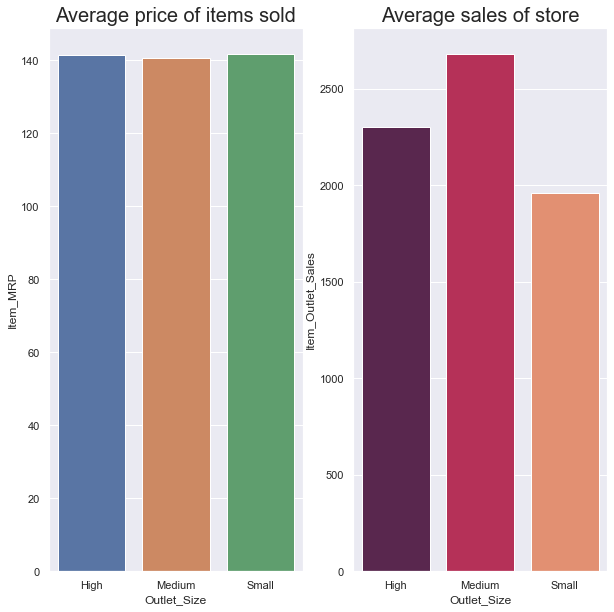

In [527]:
fig8=plt.figure(figsize=(10,10))
ax1=fig8.add_subplot(121)
sns.barplot('Outlet_Size','Item_MRP',data=df_size_sales,ax=ax1)

ax2=fig8.add_subplot(122)
sns.barplot('Outlet_Size','Item_Outlet_Sales',data=df_size_sales,ax=ax2,palette='rocket')

ax1.set_title('Average price of items sold',size=20)
ax2.set_title('Average sales of store',size=20)

In [528]:
#The average price of items sold in each outlet store size is nearly the same which is Rs 140. 
#The medium stores seem to sell better followed by high sized and then small sized stores.

In [529]:
df_train.Outlet_Location_Type.value_counts()

Tier 3    3288
Tier 2    2785
Tier 1    2316
Name: Outlet_Location_Type, dtype: int64

In [530]:
df_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store         949
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Outlet_Location_Type and Outlet_Type

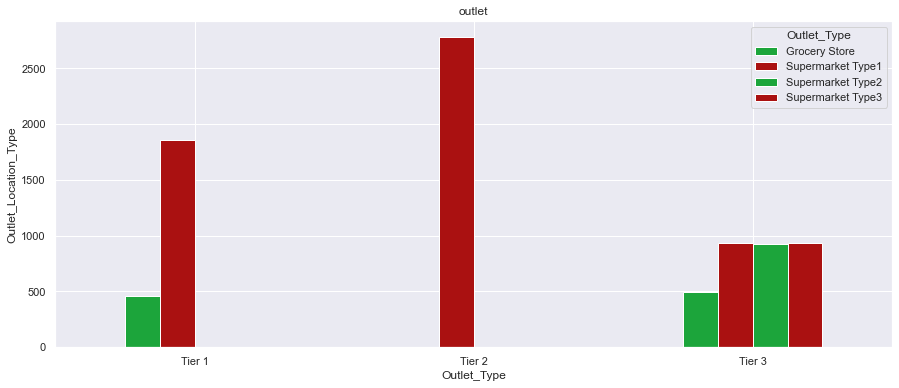

In [531]:
pd.crosstab(df_train.Outlet_Location_Type,df_train.Outlet_Type).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('outlet')
plt.xlabel('Outlet_Type')
plt.xticks(rotation=0)
plt.ylabel('Outlet_Location_Type')
plt.show()

In [532]:
# majoirty of the stores are of type 1 supermarket distributed over various location tiers.

#Supermarket type 2 and 3 are confined to only tier 3 locations.
#Very small section of the stores are actually grocery stores.

In [533]:
# tier 3 locations seem to be selling better than both tier 2 and tier 1. 
# tier 3 has more number of stores in it. Hence, the sales are better too.

In [534]:
#we will try to check the correlations of each term with the other.

<AxesSubplot:>

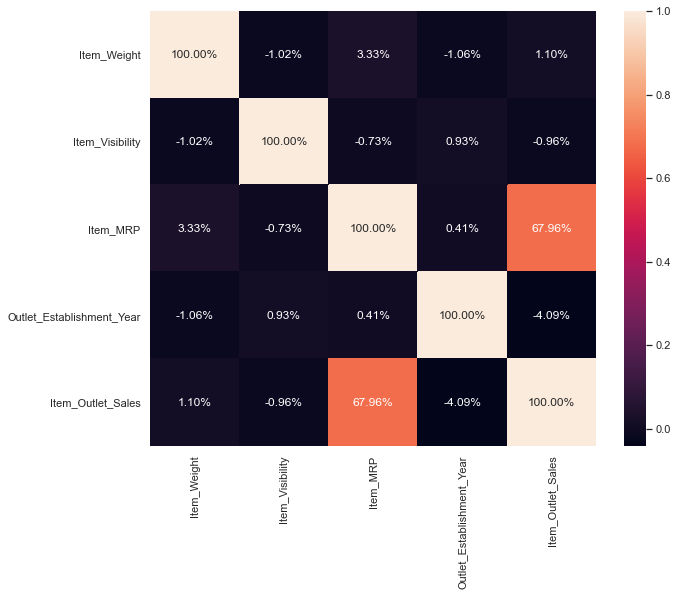

In [535]:
corrs=df_train.dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs,annot=True,fmt='.2%')

In [536]:
#we can see that correlation of Item_Weight is extremely low.
#Hence, we can simply drop this column and get done with the issues of null values

In [537]:
#We shall similarly remove the order_size as there is no way to deal with the null values here aswell.
#We would also get rid of the item_identifier and outlet_indetifier 

In [538]:
unn_cols=['Item_Weight','Outlet_Size','Item_Identifier','Outlet_Identifier']

for cols in unn_cols:
    df_train.drop(cols,axis=1,inplace=True)

Data Wrangling

In [539]:
df_train['Item_Fat_Content'].replace('Low Fat',1,inplace=True)
df_train['Item_Fat_Content'].replace('Regular',0,inplace=True)

In [540]:
df_dummies_type=pd.get_dummies(df_train['Item_Type'])

In [541]:
df_train=df_train.merge(df_dummies_type,on=df_train.index)

In [542]:
df_train.drop('key_0',axis=1,inplace=True)
df_train.drop('Item_Type',axis=1,inplace=True)

In [543]:
df_train['Outlet_Location_Type'].replace('Tier 1',1,inplace=True)
df_train['Outlet_Location_Type'].replace('Tier 2',2,inplace=True)
df_train['Outlet_Location_Type'].replace('Tier 3',3,inplace=True)

In [544]:
df_dummies_outlet=pd.get_dummies(df_train['Outlet_Type'])
df_train=df_train.merge(df_dummies_outlet,on=df_train.index)

In [545]:
df_train.drop('key_0',axis=1,inplace=True)
df_train.drop('Outlet_Type',axis=1,inplace=True)

In [546]:
targets=df_train['Item_Outlet_Sales']
df_train.drop('Item_Outlet_Sales',axis=1,inplace=True)
df_train.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0.016047,249.8092,1999,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0.019278,48.2692,2009,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0.016760,141.6180,1999,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0.000000,182.0950,1998,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.000000,53.8614,1987,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Training phase

In [547]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [548]:
X_train,X_test,y_train,y_test=train_test_split(df_train,targets,shuffle=True,test_size=0.2,random_state=0)

In [549]:
from sklearn.linear_model import LinearRegression

In [550]:
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)

LinearRegression()

In [551]:
reg_lin.score(X_train,y_train)

0.5620345988855906

In [552]:
y_preds_lin=reg_lin.predict(X_test)

In [553]:
rmse_lin=np.sqrt(mean_squared_error(y_preds_lin,y_test))
print('RMSE for Linear Regression:{0:.2f}'.format(rmse_lin))

RMSE for Linear Regression:1130.81


Text(0.5, 1.0, 'Linear Regression \n RMSE: 1130.81')

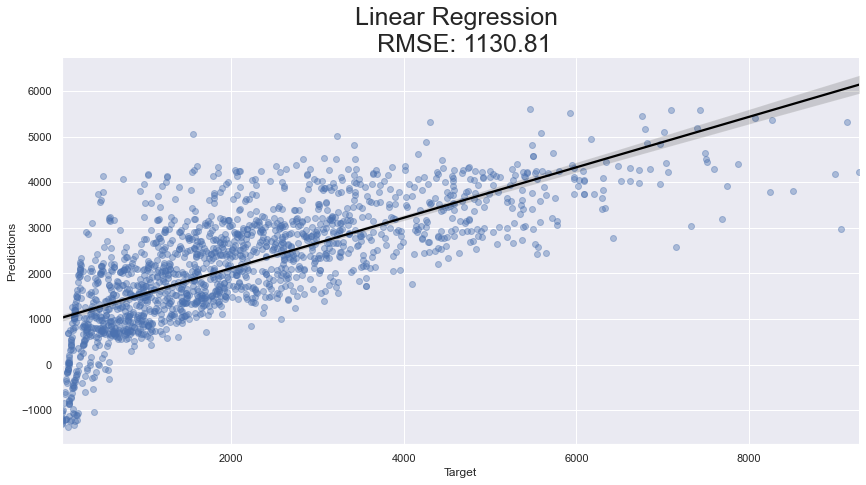

In [554]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=y_preds_lin

sns.lmplot('Target','Predictions',data=reg_lin_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Linear Regression \n RMSE: {0:.2f}'.format(rmse_lin),size=25)

In [555]:
#the values are too scattered away from the black line which is the ideal region of the scatters. 
#The RMSE is quite high too.


In [556]:
#RANDOM FOREST REGRESSION

In [557]:
#Let us apply Random Forest regression using a hyperparameter tuning method called GridSearchCV 
#where we shall change n_estimators and max_depth

In [558]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [559]:
rfr=RandomForestRegressor(random_state=0)
param_grid={'n_estimators':[3,4,5,7,9,10,12], 'max_depth':[5,7,9,10,12]}
grid=GridSearchCV(rfr,param_grid,scoring='r2',cv=10)

In [560]:
grid_result=grid.fit(X_train,y_train)
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [561]:
grid_result.score(X_train,y_train)

0.6037626015518893

In [562]:
y_preds_rfr=grid_result.predict(X_test)
rmse_rfr=np.sqrt(mean_squared_error(y_preds_rfr,y_test))
print('RMSE for Random Forest Regression:{0:.2f}'.format(rmse_rfr))

RMSE for Random Forest Regression:1077.74


Text(0.5, 1.0, 'Random Forest Regression \n RMSE: 1077.74')

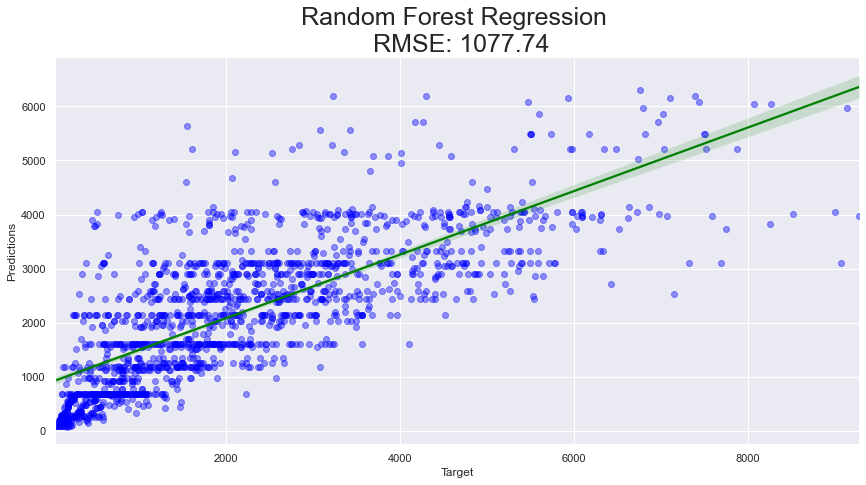

In [563]:
rfr_df=pd.DataFrame()
rfr_df['Target']=y_test
rfr_df['Predictions']=y_preds_rfr

sns.lmplot('Target','Predictions',data=rfr_df,height=6,aspect=2,line_kws={'color':'green'},scatter_kws={'alpha':0.4,'color':'blue'})
plt.title('Random Forest Regression \n RMSE: {0:.2f}'.format(rmse_rfr),size=25)

In [564]:
#it is observed that Random Forest regression technique has done better than Linear regression techniques.

In [565]:
def random_forest():
    from sklearn.ensemble import RandomForestRegressor 
    from sklearn.metrics import mean_squared_error, r2_score
    import matplotlib.pyplot as plt
    

    #Model fitting on training set
    rfr = RandomForestRegressor(criterion="mse",max_depth=2,random_state=10)
    rfr.fit(X_train,y_train)
    
    #prediction for train test and test test
    y_pred_train = rfr.predict(X_train)
    y_pred_test = rfr.predict(X_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - rfr.predict(X_train)) ** 2)
    test_mse = np.mean((y_test - rfr.predict(X_test))** 2)
    print('               Decision_Tree        ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    
    print('               Decision_Tree        ')
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((len(residual),)), plot=ax, fit=True)

               Decision_Tree        
Train MSE is 1608063.8690235347
Test MSE is 1559151.9132194596
Train RMSE is: 1268.094582049594
Test RMSE is 1248.6600470982723
r2 score is 0.437444647060119
               Decision_Tree        
None


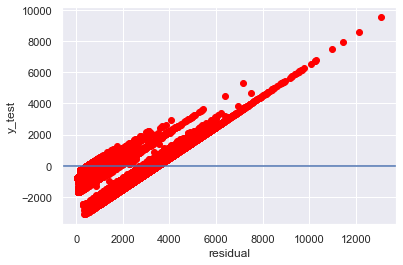

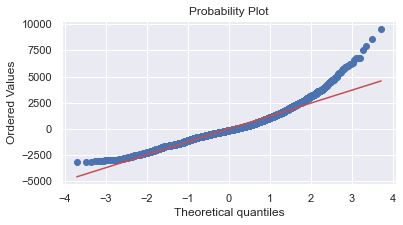

In [566]:
print(random_forest())

B) Testing Phase

In [567]:
df_identifiers=pd.DataFrame(df_test['Item_Identifier'])
df_identifiers['Outlet_Identifier']=df_test['Outlet_Identifier']

In [568]:
unn_cols=['Item_Weight','Outlet_Size','Item_Identifier','Outlet_Identifier']

for cols in unn_cols:
    df_test.drop(cols,axis=1,inplace=True)

In [569]:
df_test.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.007565,Snack Foods,107.8622,1999,Tier 1,Supermarket Type1
1,reg,0.038428,Dairy,87.3198,2007,Tier 2,Supermarket Type1
2,Low Fat,0.099575,Others,241.7538,1998,Tier 3,Grocery Store
3,Low Fat,0.015388,Snack Foods,155.0340,2007,Tier 2,Supermarket Type1
4,Regular,0.118599,Dairy,234.2300,1985,Tier 3,Supermarket Type3


In [570]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('low fat','Low Fat')
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('LF','Low Fat')
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('reg','Regular')

In [571]:
df_test['Item_Fat_Content'].replace('Low Fat',1,inplace=True)
df_test['Item_Fat_Content'].replace('Regular',0,inplace=True)

In [572]:
df_dummies_type=pd.get_dummies(df_test['Item_Type'])
df_test=df_test.merge(df_dummies_type,on=df_test.index)

In [573]:
df_test.drop('key_0',axis=1,inplace=True)
df_test.drop('Item_Type',axis=1,inplace=True) 

In [574]:
df_test['Outlet_Location_Type'].replace('Tier 1',1,inplace=True)
df_test['Outlet_Location_Type'].replace('Tier 2',2,inplace=True)
df_test['Outlet_Location_Type'].replace('Tier 3',3,inplace=True)

In [575]:
df_dummies_outlet=pd.get_dummies(df_test['Outlet_Type'])
df_test=df_test.merge(df_dummies_outlet,on=df_test.index)

In [576]:
df_test.drop('key_0',axis=1,inplace=True)
df_test.drop('Outlet_Type',axis=1,inplace=True)

In [577]:
df_test.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0.038428,87.3198,2007,2,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0.099575,241.7538,1998,3,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0.015388,155.0340,2007,2,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0.118599,234.2300,1985,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [578]:
df_train.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0.016047,249.8092,1999,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0.019278,48.2692,2009,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0.016760,141.6180,1999,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0.000000,182.0950,1998,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.000000,53.8614,1987,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [579]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100,min_samples_split=5)

In [580]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100, min_samples_split=5)

In [581]:
dtr.score(X_train,y_train)

0.6074525892756626

In [582]:
##it is observed that decision tree technique has done better 

In [583]:
import xgboost as xgb

In [589]:
xgb_reg=xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [590]:
xgb_reg.fit(X_train,y_train)
xgb_reg.score(X_train,y_train)

[17:20:43] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.7354909548312831

In [591]:
y_preds_xgb=xgb_reg.predict(X_test)
rmse_xgb=np.sqrt(mean_squared_error(y_preds_xgb,y_test))
print('RMSE for XGBoost Regression:{0:.2f}'.format(rmse_xgb))

RMSE for XGBoost Regression:1125.96


Text(0.5, 1.0, 'XGBoost Regression \n RMSE: 1125.96')

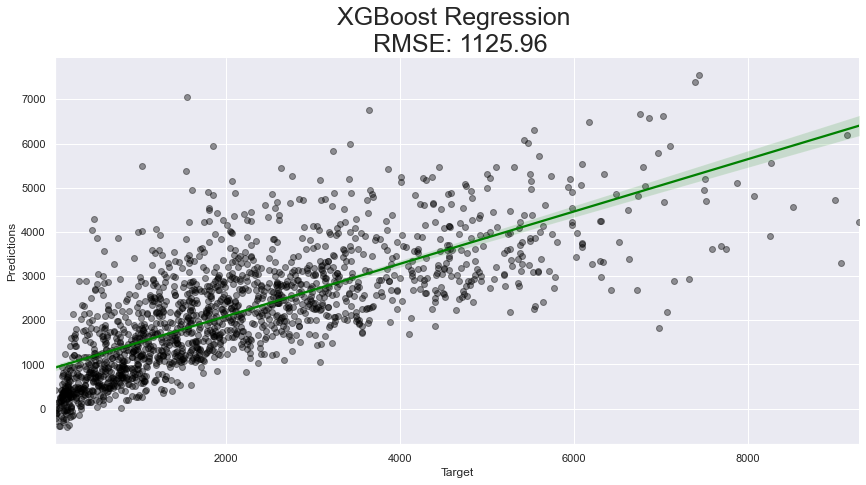

In [595]:
ada_df=pd.DataFrame()
ada_df['Target']=y_test
ada_df['Predictions']=y_preds_xgb

sns.lmplot('Target','Predictions',data=ada_df,height=6,aspect=2,line_kws={'color':'green'},scatter_kws={'alpha':0.4,'color':'black'})
plt.title('XGBoost Regression \n RMSE: {0:.2f}'.format(rmse_xgb),size=25)

In [ ]:
#it is time for us to apply them to the test dataframe. 
#We will use the top  regressor for our solution submission which is
# Random Forest regressor 

In [594]:
y_preds_rfr=grid_result.predict(df_test)
df_rfr_submission=df_identifiers
df_rfr_submission['Item_Outlet_Sales']=y_preds_rfr
df_rfr_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1609.017103
1,FDW14,OUT017,1263.040194
2,NCN55,OUT010,583.257242
3,FDQ58,OUT017,2446.288967
4,FDY38,OUT027,5969.300166
